# CUSTOMER PURCHASE BEHAVIOUR ANALYSIS - DATA ANALYTICS PROJECT

## Identifying and sourcing relevant datasets 

In [1]:
import numpy as np #Used for working with arrays 
import pandas as pd #used for working with tables 
import matplotlib.pyplot as plt #used for visualising data
import seaborn as sns #used for complex visualizations 

In [2]:
#import the csv file 
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\CODING\DATA ANALYSIS\Diwali Sales Download Github\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv', encoding= 'unicode_escape')
#df standds for dataframe or table 
#pd is the pandas and the r used is before the file name or location because r(raw string) it tells python "Take this string literally — do not treat backslashes (\) as special characters."
#While it is necessary that the file that we are using and the csv file are inside the same folder and for that we use the properties of the csv file and copy the location asnd put a / with the file name next to it 
#encoding = 'unicode_escape' means that if there are special characters then handle it properly and don't throw any error (logic : Every character is stored as a byte but some special characters don't have teh ASCII code and that's why we choose 
#Encoding as unicode_escape , while there are different types of encoding such as UTF-8(most common) , ISO-8859-1

In [3]:
df.shape
#used to check the size of dataFrame

(11251, 16)

In [4]:
df.head()
#used to display the first 5 values of dataframe by default
#df.head(10) will show 10 values from the DataFrame

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1,Date
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN,2020-10-06 01:59:02.400
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN,2020-10-12 04:17:16.800
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN,2020-10-05 02:33:36.000
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN,2020-11-25 17:51:21.600
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN,2020-11-18 23:02:24.000


## Data Cleaning and handling Missing Values

In [5]:
df.info()
#The df.info() method in pandas displays a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
 15  Date              11251 non-null  object 
dtypes: float64(3), int64(4), object(9)
memor

In [6]:
#drop unrelated/blank columns
df.drop(['Status' , 'unnamed1'], axis = 1 , inplace = True)
#df.drop will drop the columns that have no values inside it and always place the column names inside [] brackets 
# axis = 1 means that we want to remove colums while axis = 0 means that we want to remove rows 
#inplace = True means that we permanantly want to change the dataframe not create a copy.
#If inplace=False (default), it just returns a new DataFrame and doesn't change df.

In [7]:
df.shape
#Again checking the size of data frame to ensure the colums are deleted 
#Old data frame size - (11251, 15)

(11251, 14)

In [8]:
#check for null values 
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
pd.isnull(df).sum()
#This prints out the sum of all the rows that have null values while pd.isnull() only returns True/false whether the results are null or not 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
Date                 0
dtype: int64

In [10]:
#Drop the null values 
df.dropna(inplace = True)
#dropna is a pandas function that is used to handle the null values 

In [11]:
#Check if the null values have been dropped 
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
Date                0
dtype: int64

In [12]:
df.shape
#This can sure us that the rows have been removed , there were 11251 rows in the df and now there are 12139 which means that 12 rows have been removed that contained null values
#Also we have removed two colums because they didn't had any values as checked by df.info() and --->
#df.drop(['Status' , 'unnamed1'], axis = 1 , inplace = True) dropped by this command statement 

(11239, 14)

In [13]:
#From df.info(0 we can see that the amount contains float values ans we want to change them to int 
#Change data type but first check the name of the column that contains amount using 
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date'],
      dtype='object')

In [14]:
#As we can clearly see above that Amount is the column that contains the float values and now changing data type 
df['Amount'] = df['Amount'].astype('int')
#.astype('int') :- This converts the data type of the Amount column to integer (int).

In [15]:
#Now check if the column data-type has been changed if multiple data-types have been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
 13  Date              11239 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.3+ MB


In [16]:
#If a single column data type has been changed then to check :-
df['Amount'].dtypes

dtype('int64')

## Data Integrity and Consistency Checks

In [17]:
# Data Integrity and Consistency Checks

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate Rows: {duplicate_rows}")

# Remove trailing spaces from string columns and standardize case
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()
    
# Recheck data types and structure
df.info()


Duplicate Rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
 13  Date              11239 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.3+ MB


In [18]:
#Rename column
df.rename(columns = {'Shaadi' : 'Marital_Status'} , inplace = True)
#But the above command will not make the changes permanently in the data frame 
#To permanently make the changes 
#1. df.rename(columns={'Marital_Status': 'Shaadi'}, inplace=True)
#2. df = df.rename(columns={'Marital_Status': 'Shaadi'})
# We can use the second one to rename if we don't want to use inplace 


In [19]:
df.head(5)
#I have used this command to check if the name has been changes completelty and after that I again switched back the column names 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Date
0,1002903,sanskriti,p00125942,f,26-35,28,0,maharashtra,western,healthcare,auto,1,23952,2020-10-06 01:59:02.400
1,1000732,kartik,p00110942,f,26-35,35,1,andhraâ pradesh,southern,govt,auto,3,23934,2020-10-12 04:17:16.800
2,1001990,bindu,p00118542,f,26-35,35,1,uttar pradesh,central,automobile,auto,3,23924,2020-10-05 02:33:36.000
3,1001425,sudevi,p00237842,m,0-17,16,0,karnataka,southern,construction,auto,2,23912,2020-11-25 17:51:21.600
4,1000588,joni,p00057942,m,26-35,28,1,gujarat,western,food processing,auto,2,23877,2020-11-18 23:02:24.000


In [20]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [21]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Outlier Handling

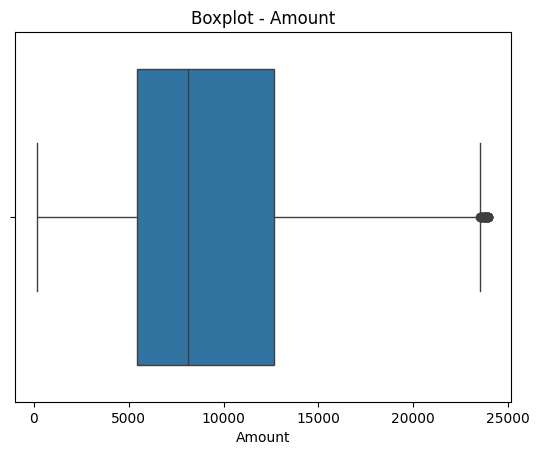

Outliers removed using IQR method


In [22]:

# Outlier Detection using IQR Method

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'Amount'
sns.boxplot(x=df['Amount'])
plt.title('Boxplot - Amount')
plt.show()

# IQR Calculation
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
print("Outliers removed using IQR method")


# Sales Trend Over Time

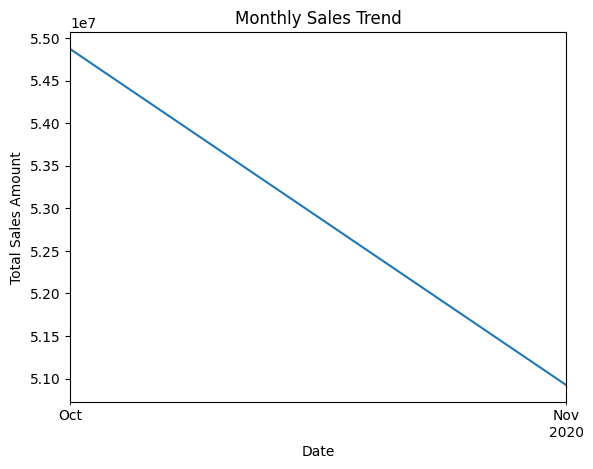

In [23]:
# dataset only covers two months: October and November 2020.
# Sales Trend Over Time

# Converting Date column to datetime if exists or create dummy
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    sales_trend = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
    sales_trend.plot(kind='line', title='Monthly Sales Trend')
    plt.ylabel('Total Sales Amount')
    plt.show()
else:
    print("Date column not available for trend analysis.")


In [24]:
print("Unique Dates:", df['Date'].nunique())
print(df['Date'].describe())


Unique Dates: 11220
count                            11220
mean     2020-10-31 00:20:29.867807232
min                2020-10-01 00:00:00
25%         2020-10-16 00:32:38.400000
50%         2020-10-31 00:49:55.200000
75%         2020-11-15 00:13:26.400000
max                2020-11-30 00:00:00
Name: Date, dtype: object


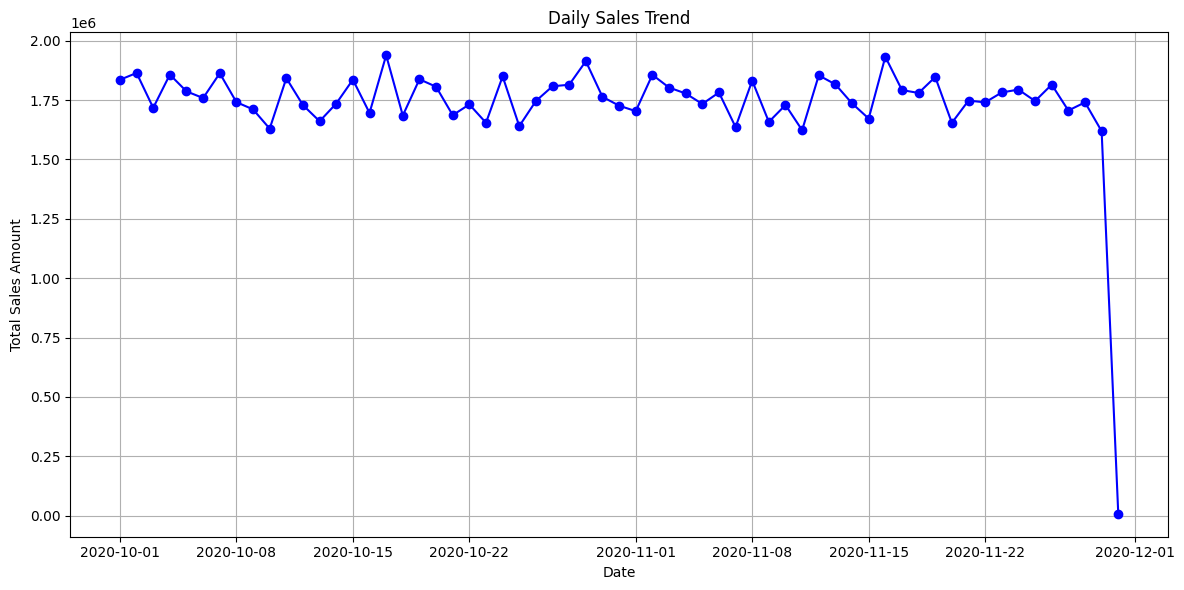

In [25]:
# Convert to datetime and keep only date (remove hours, minutes, seconds)
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Now group by clean Date values
daily_trend = df.groupby('Date')['Amount'].sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_trend.index, daily_trend.values, marker='o', linestyle='-', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
print("Unique Cleaned Dates:", df['Date'].nunique())
# Expected: ~61


Unique Cleaned Dates: 61


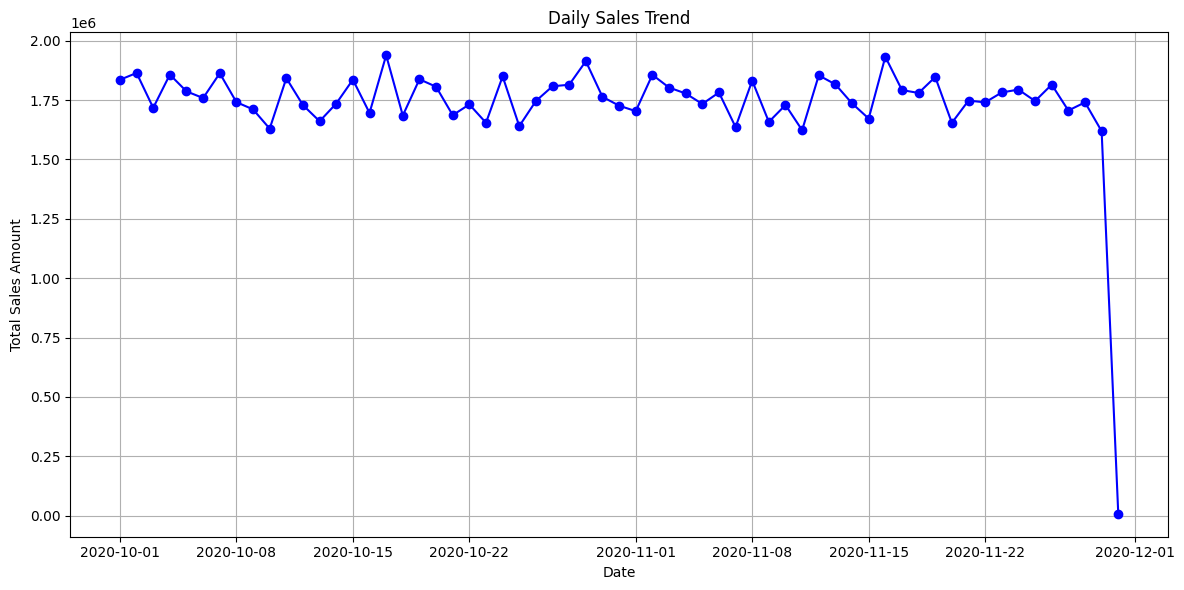

In [27]:
import matplotlib.pyplot as plt

dates = daily_trend.index
amounts = daily_trend.values

plt.figure(figsize=(12,6))
plt.plot(dates, amounts, marker='o', linestyle='-', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)

##  Gender

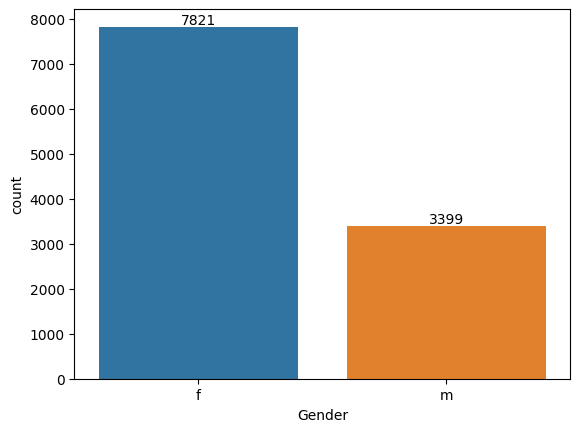

In [28]:
#plotting a bar chart for Gender and it's Count 
ax = sns.countplot(x = 'Gender' ,data =df , hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

#sns is a seaborn library for visualizations 
#countplot is used to show the count for each category where x is for the X-axis and denotes the gender 
#The data is taken from the dataframe df 
# The code ax = sns.countplot(x = 'gender' , data = df) generates the bars 
#The loop takes the two bars generated and then "Go through each group of bars in the chart"(for bars in ax.containers)
# ax.bars_label(bars) :-This adds the number on top of each bar.
#THis bar graph generates a count bar graph of genders vs count 

<Axes: xlabel='Gender', ylabel='Amount'>

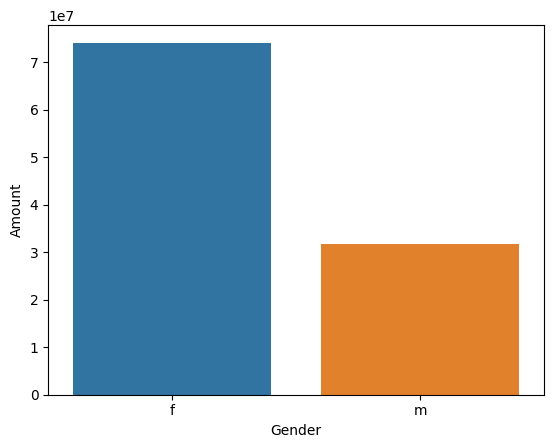

In [29]:
#Plotting a bar chart for gender vs total amount 

sales_gen = df.groupby(['Gender'] , as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_gen , hue = 'Gender')

# df.groupby groups rows by gender so all males are grouped together and all females are grouped together 
#['Amount'].sum() actually sums all the values from the Amount columns for the groups male and female 
#as_index=False → Keeps 'Gender' as a normal column (not index), which makes it easier to plot.
#When you use groupby() in pandas, by default, the column you group by becomes the index of the resulting DataFrame.
# .sort_values(by='Amount', ascending=False) :  THis sorts the table so that the gender with the highest total sales comes first 
# and then we have plotted the bar graph using sns.barplot(x, y , data)


*From the above graph we can see that most of the buyers are females and even the purchasing power of females are greater than men*

## Age

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date'],
      dtype='object')

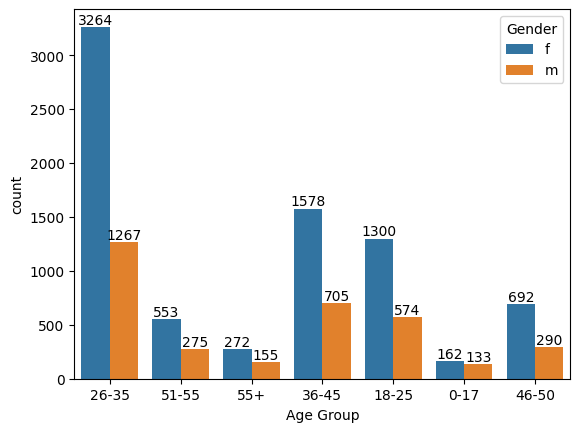

In [31]:
#Column name 'Age Group'
ax = sns.countplot(data = df , x = 'Age Group' , hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)


#Similar code as Gender barplot above where sns is a seaborn library for visualizations 
#countplot is used to show the count for each category where x is for the X-axis and denotes the Age group Column
#

<Axes: xlabel='Age Group', ylabel='Amount'>

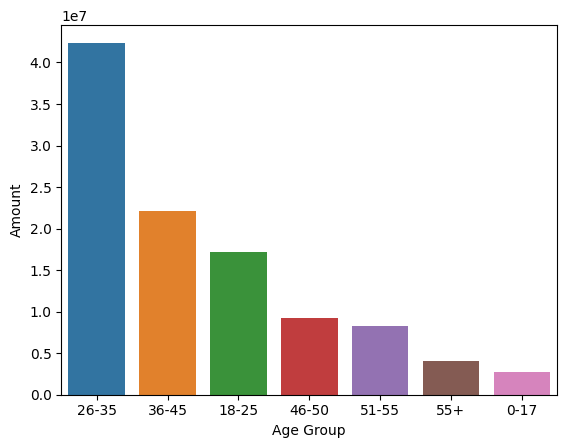

In [32]:
#Total Amount vs Age group
sales_age = df.groupby(['Age Group'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
sns.barplot(x = 'Age Group' , y='Amount' , data = sales_age , hue = 'Age Group')

*From the above graph we can see that the most of the buyers are of age group between 26 to 35 yrs female*

## State 

<Axes: xlabel='State', ylabel='Orders'>

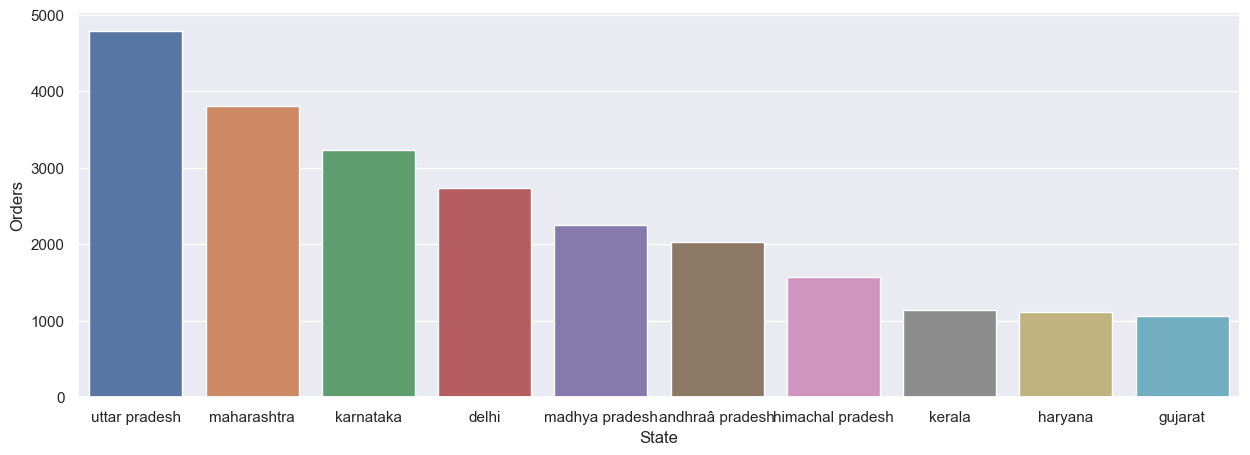

In [33]:
#Total numbers of orders from top 10 states 

sales_state = df.groupby(['State'] , as_index = False) ['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(data = sales_state , x ='State' , y = 'Orders' , hue = 'State')

#sns.set is to set the chart size and sns.barplot is used to draw the bar graph

<Axes: xlabel='State', ylabel='Amount'>

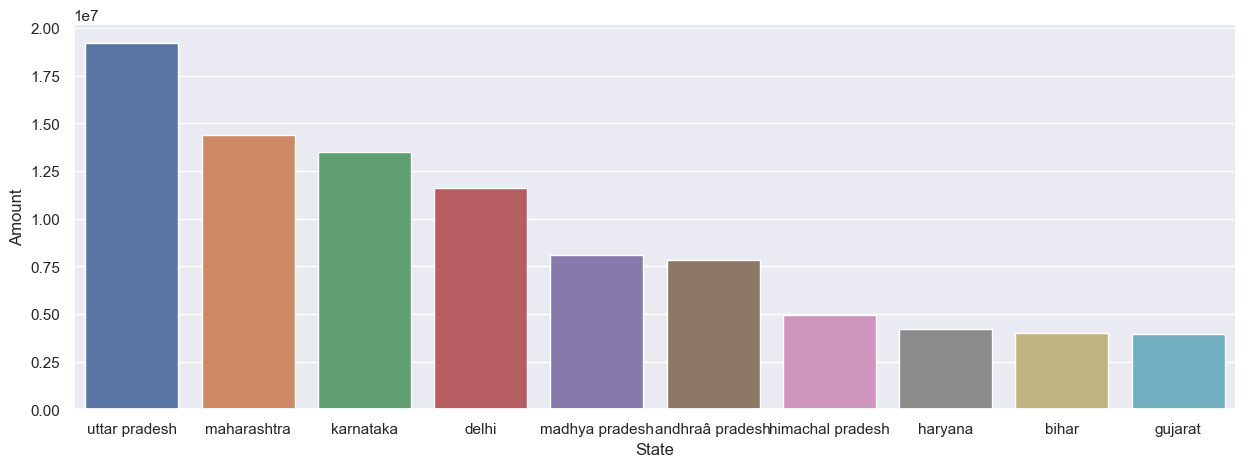

In [34]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'] , as_index=  False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'State' , y= 'Amount' , hue = 'State' , data = sales_state)

*From the above graph we can see that most of the orders and total sales/amount are from uttar Pradesh , Maharastra and karnataka respectively*

## Martial Status

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date'],
      dtype='object')

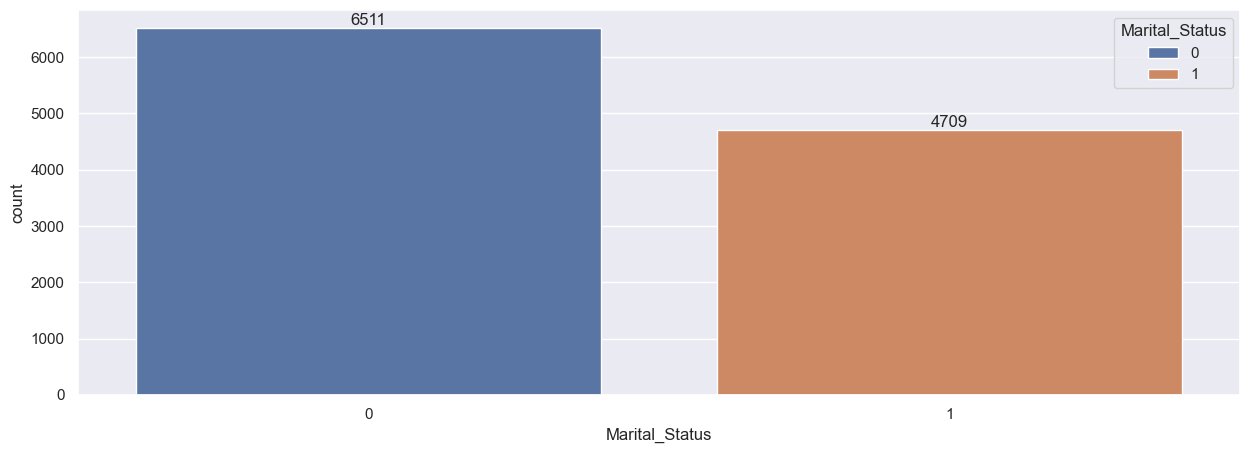

In [36]:
ax = sns.countplot(data = df , x='Marital_Status' , hue ='Marital_Status')
sns.set(rc = {'figure.figsize':(5 , 6)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

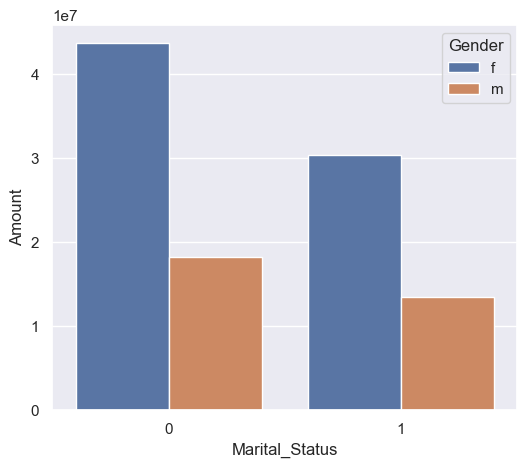

In [37]:
#Amount vs Marital_status

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by ='Amount' , ascending = False)

sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(data = sales_state , x = 'Marital_Status' , y = 'Amount' , hue = 'Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

## Occupation 

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date'],
      dtype='object')

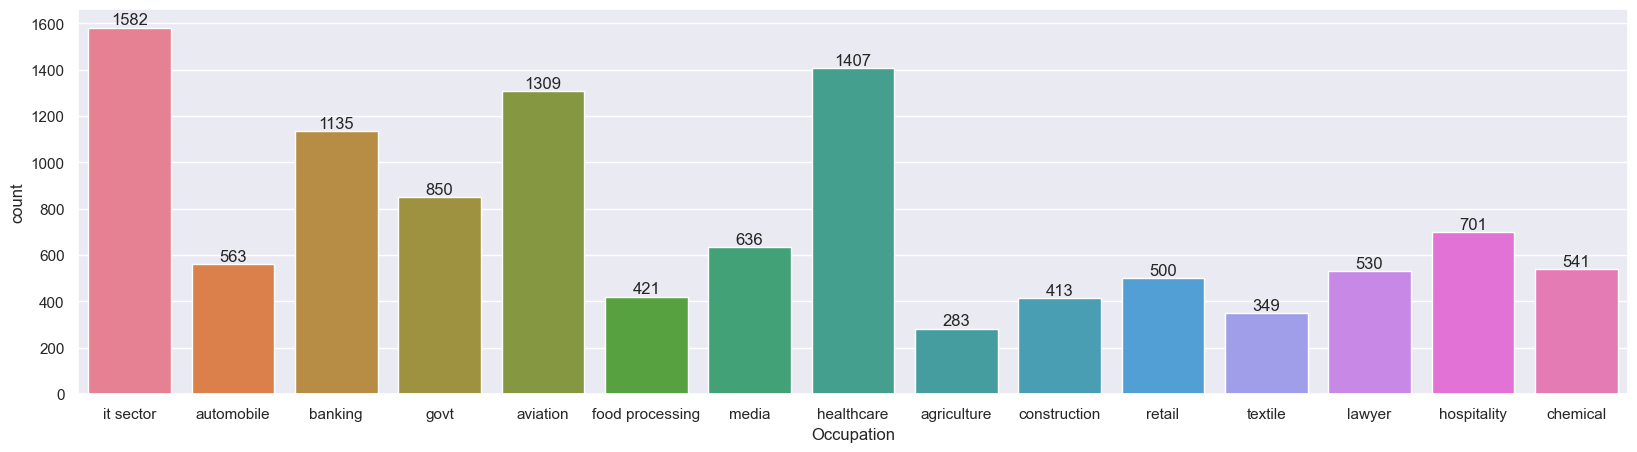

In [39]:
sns.set(rc = {'figure.figsize' : (20,5)})
ax = sns.countplot(data = df , x = 'Occupation' , hue = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

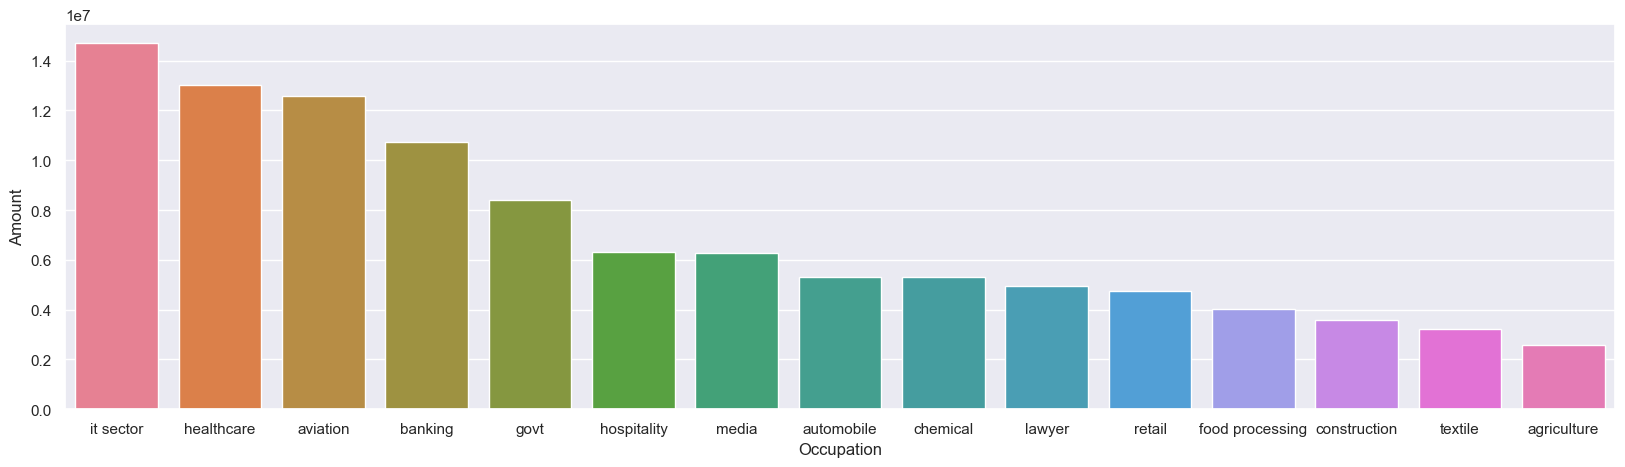

In [40]:
#Occupation vs Amount 

sales_state = df.groupby(['Occupation'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_state , x = 'Occupation' , y = 'Amount' , hue = 'Occupation')

*From the Above graphs of occupations vs amount and people highest in the occupation , we can see that the most of the buyers are working in IT , Healthcare and Aviation Sector.*

## Product Category

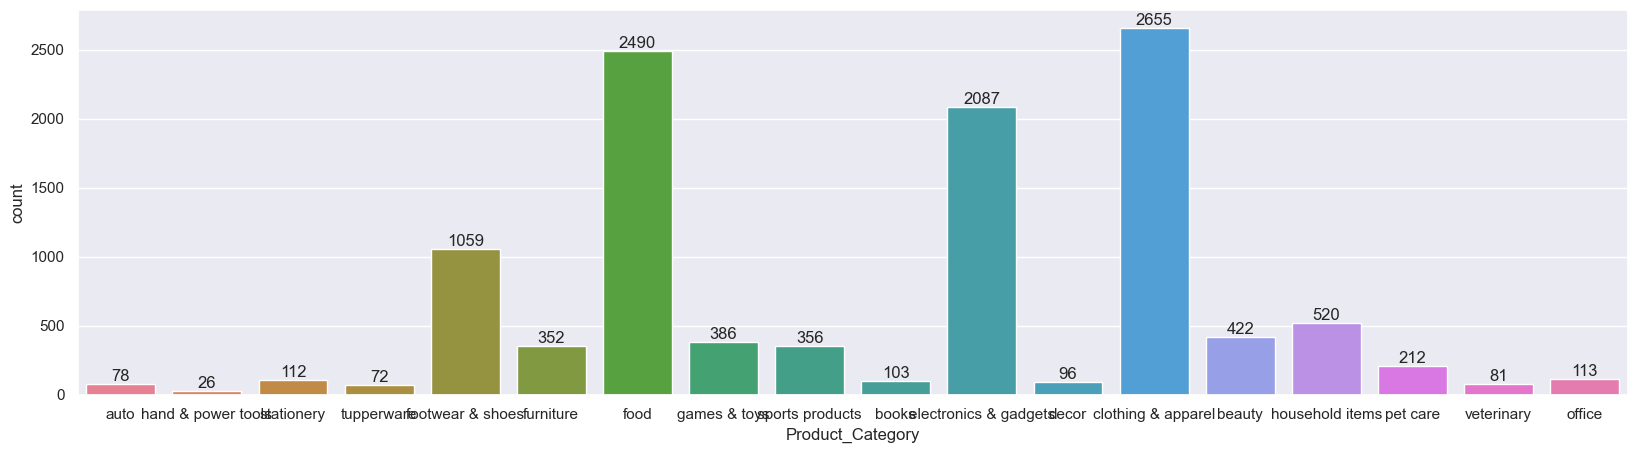

In [41]:
#Count plot 
sns.set(rc ={'figure.figsize' : (20,5)})
ax = sns.countplot(data =df , x ='Product_Category' , hue ='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

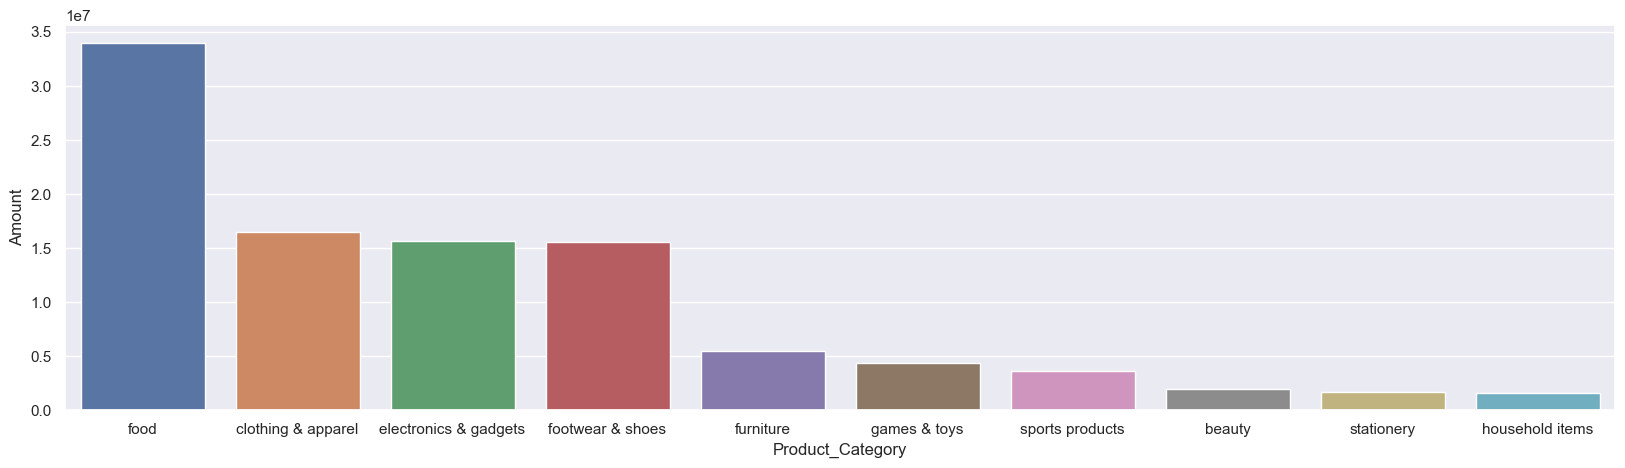

In [42]:
#Amount vs Product_category plot of bar graph 
sns.set(rc = {'figure.figsize' : (20,5)})

sales_state = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by ='Amount' , ascending=False).head(10)

sns.barplot(data = sales_state , x = 'Product_Category' , y = 'Amount' , hue  = 'Product_Category')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

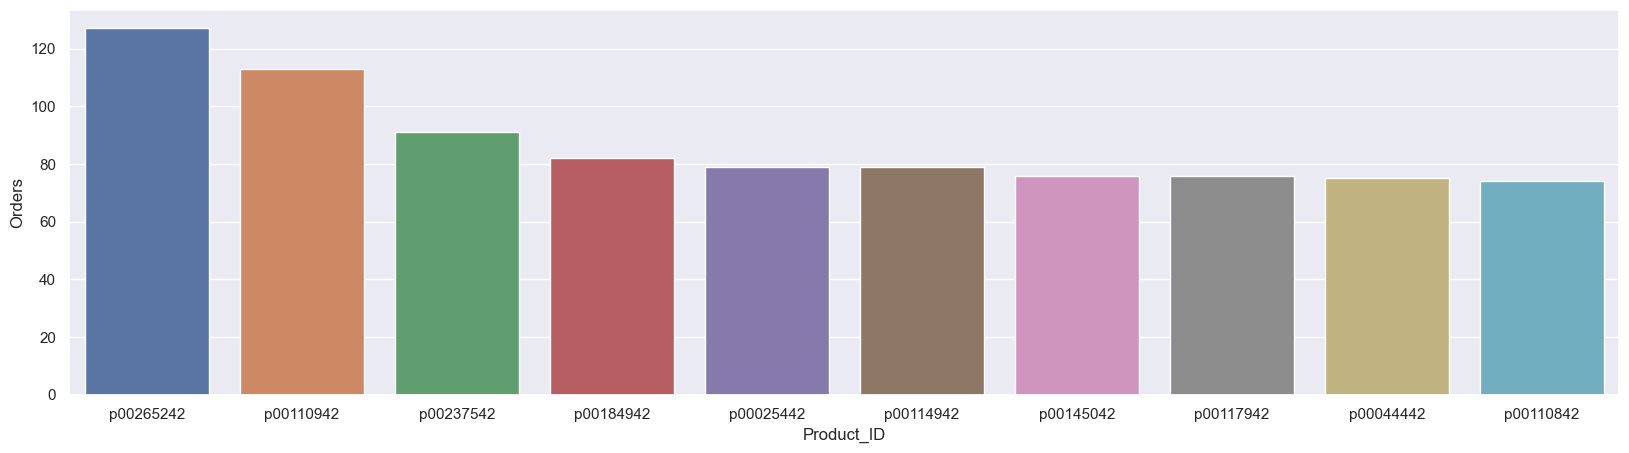

In [43]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders' , hue = 'Product_ID')

<Axes: xlabel='Product_ID'>

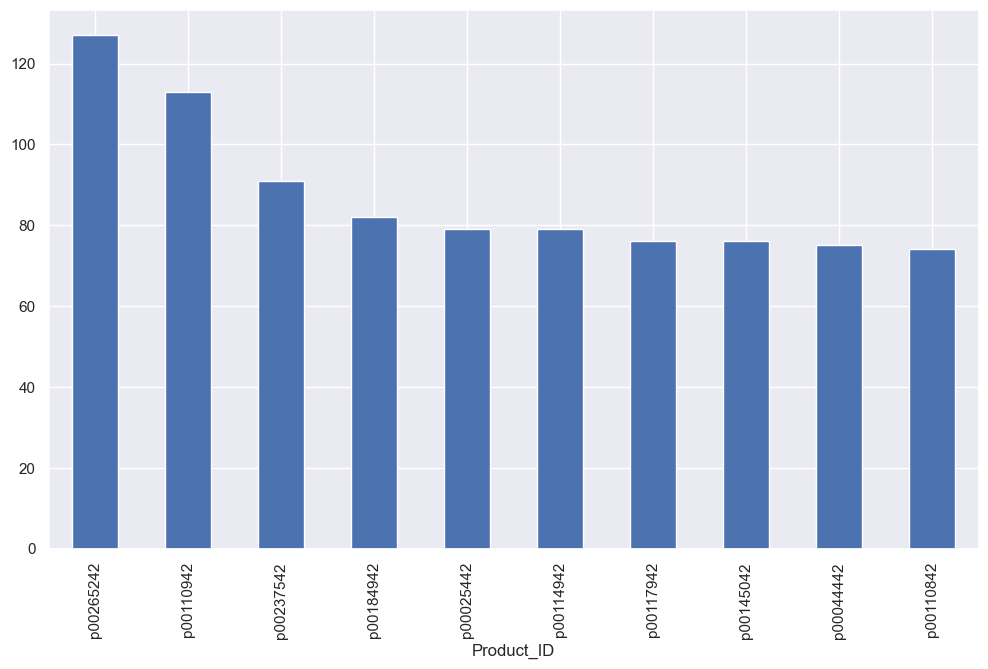

In [44]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## PIE CHART AND HEAT MAP

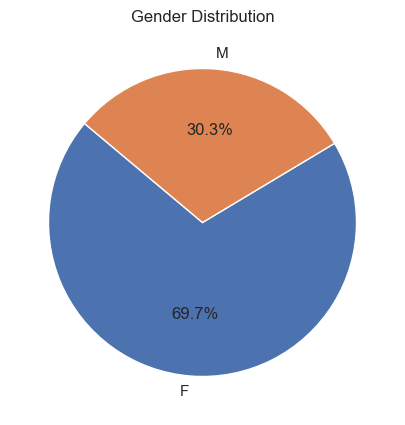

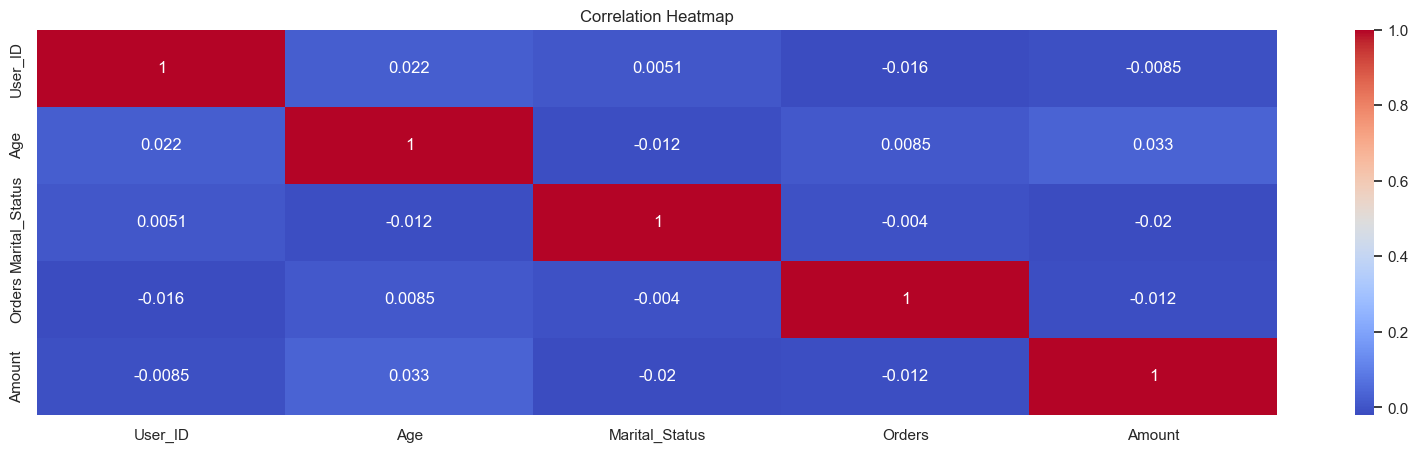

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# PIE CHART
df['Gender'] = df['Gender'].astype(str).str.strip().str.title()
gender_counts = df['Gender'].dropna().value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# HEATMAP
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [46]:
!pip install plotly



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:

# 📌 Interactive Plot with Plotly
import plotly.express as px

# Interactive bar chart for Amount by State
fig = px.bar(df.groupby('State')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False),
             x='State', y='Amount',
             title='Total Sales Amount by State',
             labels={'Amount': 'Sales Amount'})
fig.show()



### CONCLUSION

*Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*
